# Helical Tail Dynamics

In [39]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Tail Geometry

Create parametric equations in Cylindrical Coordinates

In [40]:
def cylToCar(r, theta, z) -> tuple[list[float]]:
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y,z

In [41]:
r0 = 1
r1 = .5
spirals = 6
l = 10
dl = 1/10 # Start vertical Derivative
gamma = 4 # Ratio of start and end verical derivaties 

In [42]:
s0 = 0
s1 = spirals*2*np.pi
step = 100
s = np.linspace(s0, s1, step)

Symetric Helix

In [43]:
r = r0 * np.ones(len(s))
theta = s
z = s

zz = ss
dz = sp.diff(zz, ss)
dz = sp.lambdify(ss, dz)


x, y, z = cylToCar(r, theta, z)

Generated Tail (Cubic)

In [44]:
a, b, c, ss = sp.symbols("a, b, c, s", real=True)

# Z Function (Cubic)
z = sp.Function("z", real=True)(ss)

z = (a*ss**3 + b*ss**2 + c*ss)

dz = sp.diff(z,ss)
zSol = sp.solve((z.subs({ss: s1})-l ,dz.subs({ss: 0})-dl, dz.subs({ss: s1})-gamma*dl), (a, b, c))
z = sp.lambdify(ss, z.subs({a: zSol[a], b: zSol[b], c: zSol[c]}))
dz = sp.lambdify(ss, dz.subs({a: zSol[a], b: zSol[b], c: zSol[c]}))

# R Function (Liner)
r = sp.Function("r", real=True)(ss)

r = r0 + (r1-r0)/s1 * ss
r = sp.lambdify(ss, r)

# Parametric Functions
r = r(s)
theta = s
z = z(s)

x, y, z = cylToCar(r, theta, z)

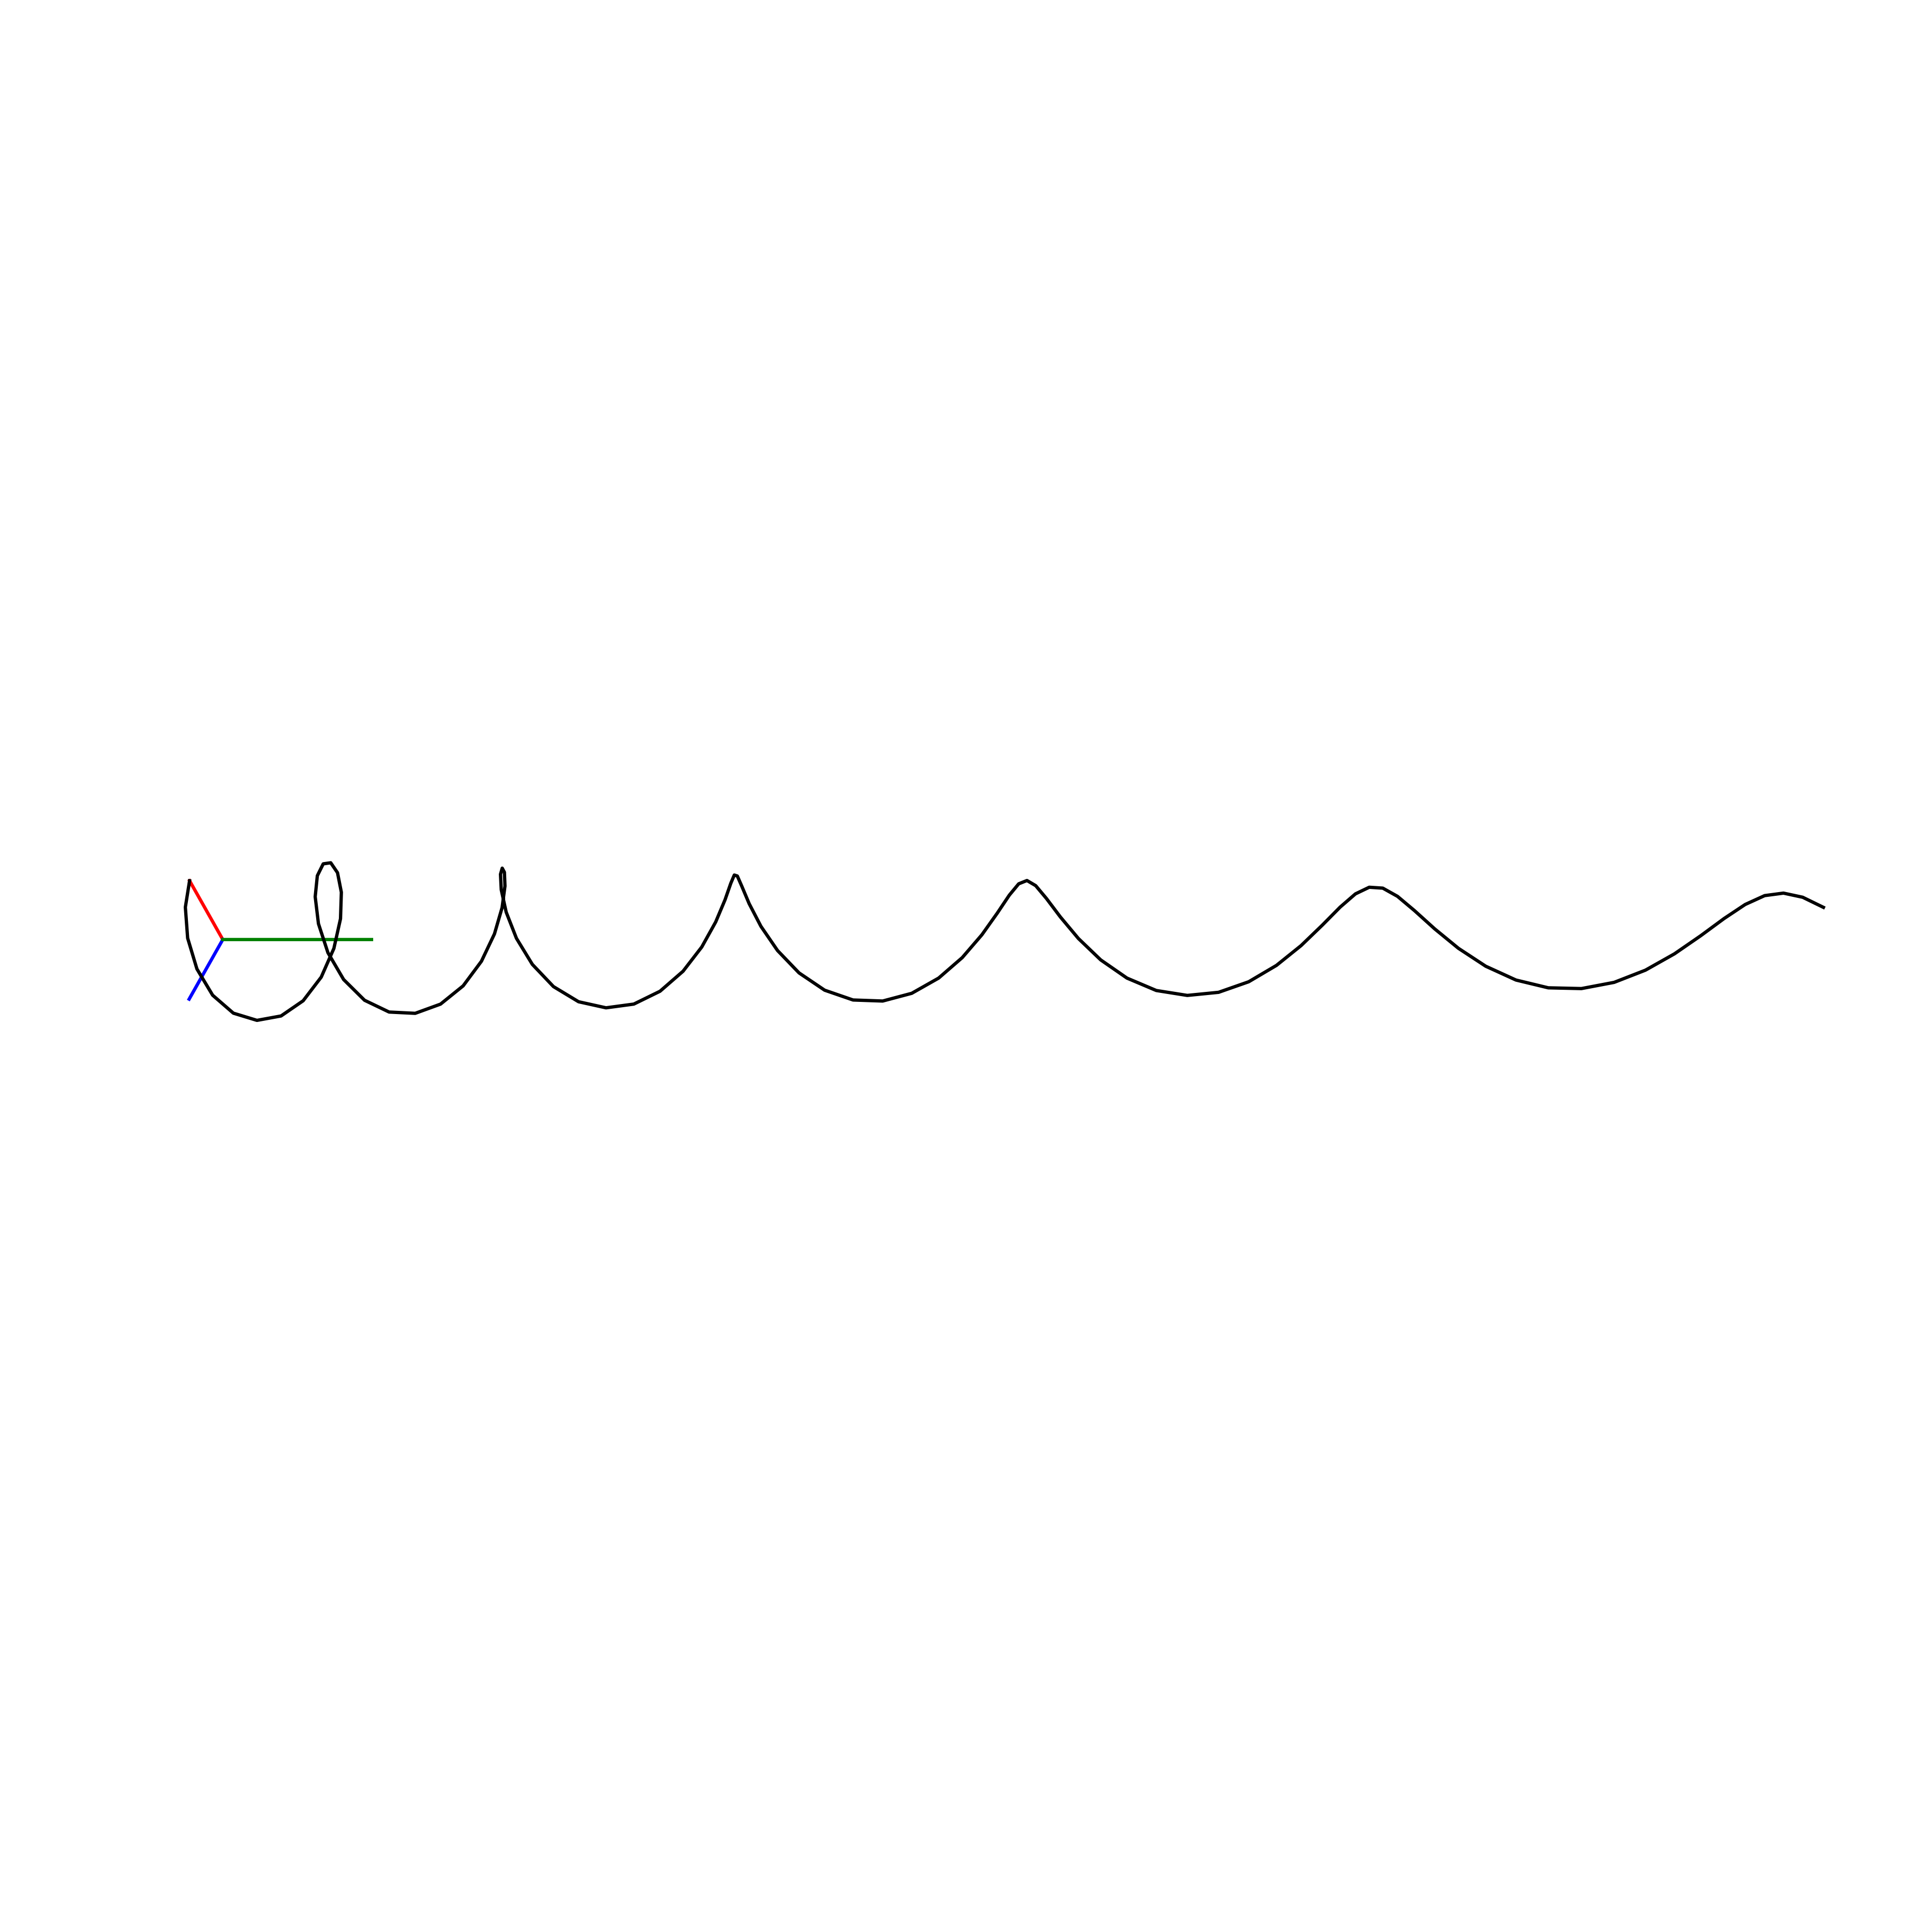

In [45]:
rect = [0, 0, 1, 1]

fig1 = plt.figure(figsize=(12, 12), dpi=300)
ax1 = fig1.add_axes(rect, projection="3d")
ax1.plot([0,1], [0,0], [0,0], 'r')
ax1.plot([0,0], [0,1], [0,0], 'b')
ax1.plot([0,0], [0,0], [0,1], 'g')
ax1.plot(x,y,z, color='k')
ax1.set_box_aspect([1,1,z[-1]])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.view_init(roll=-90, azim=45)
ax1.grid(False)
ax1.set_axis_off()

In [46]:
def plotFig(ax, x, y, color, yLabel, s0, s1, step) -> None:
    ax.plot(x, y, color)
    ax.set_ylabel(yLabel)
    for x in np.arange(s0, s1+step, step):
        plt.axvline(x, color='gray', linestyle='--', linewidth=0.5)

Text(0.5, 0.98, 'Parametric Curves')

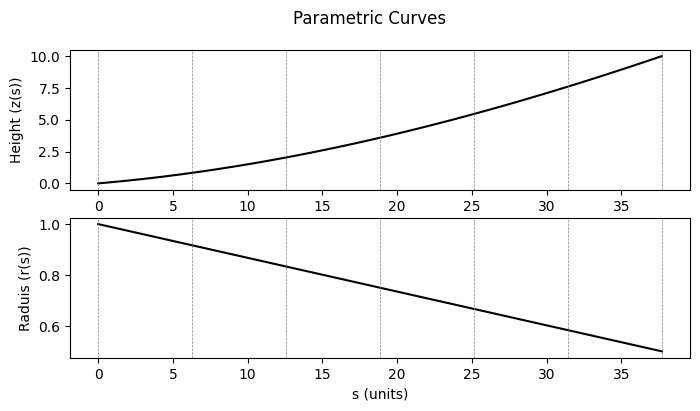

In [47]:
fig2 = plt.figure(figsize=(8,4))
ax2 = fig2.add_subplot(211)
plotFig(ax2, s, z, "k", "Height (z(s))", s0, s1, 2*np.pi)
ax2 = fig2.add_subplot(212)
plotFig(ax2, s, r, "k", "Raduis (r(s))", s0, s1, 2*np.pi)
plt.xlabel("s (units)")
plt.suptitle("Parametric Curves")

## Tail Dynamics and Forces

Force Dyanmics

In [55]:
omega = 1 # Unit Rotational Velocity

cos = np.cos(np.arctan(dz(s)))
sin = np.sin(np.arctan(dz(s)))


vParr = omega * r * cos
vPerp = omega * r * sin

FParr = - 2 * vParr
FPerp = -1 * vPerp

Fz = FParr*sin + FPerp*cos
T = r * (FParr*cos + FPerp*sin)

Plotting Force

Text(0.5, 0.98, 'Forces along Tail Length')

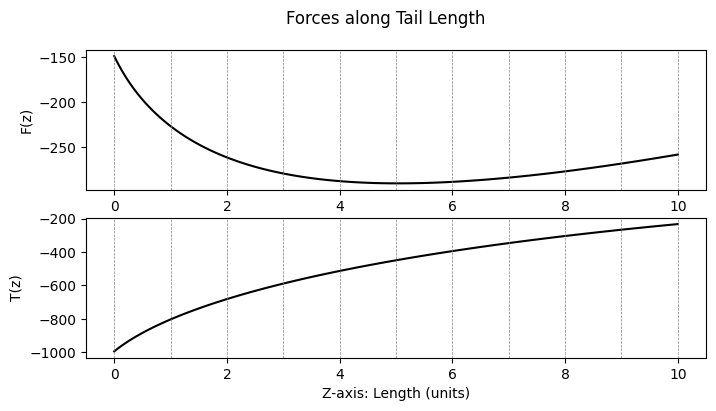

In [56]:
fig3 = plt.figure(figsize=(8,4))
ax3 = fig3.add_subplot(211)
plotFig(ax3, z, Fz, "k", "F(z)", 0, l, 1)
ax3 = fig3.add_subplot(212)
plotFig(ax3, z, T, "k", "T(z)", 0, l, 1)
plt.xlabel("Z-axis: Length (units)")
plt.suptitle("Forces along Tail Length")